In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pylab
from scipy.stats import shapiro
from sklearn.neighbors import LocalOutlierFactor
!pip install missingno
import missingno as msno;
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [2]:
#Loading the dataset
data = pd.read_csv("car_price_prediction.csv",encoding='ISO-8859-1',usecols = [1,5,7,8,9,11,12,13,17])
data.head()

,Price,Prod. year,Leather interior,Fuel type,Engine volume,Cylinders,Gear box type,Drive wheels,Airbags
0,13328,2010,Yes,Hybrid,3.5,6.0,Automatic,4x4,12
1,16621,2011,No,Petrol,3,6.0,Tiptronic,4x4,8
2,8467,2006,No,Petrol,1.3,4.0,Variator,Front,2
3,3607,2011,Yes,Hybrid,2.5,4.0,Automatic,4x4,0
4,11726,2014,Yes,Petrol,1.3,4.0,Automatic,Front,4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Prod. year        19237 non-null  int64  
 2   Leather interior  19237 non-null  object 
 3   Fuel type         19237 non-null  object 
 4   Engine volume     19237 non-null  object 
 5   Cylinders         19237 non-null  float64
 6   Gear box type     19237 non-null  object 
 7   Drive wheels      19237 non-null  object 
 8   Airbags           19237 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 1.3+ MB


In [4]:
data.columns

Index(['Price', 'Prod. year', 'Leather interior', 'Fuel type', 'Engine volume',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Airbags'],
      dtype='object')

In [5]:
data.columns = data.columns.str.lower()

In [6]:
data.rename(columns ={'gear box type':'gearbox'},inplace=True)
data.rename(columns ={'prod. year':'year'},inplace=True)

In [7]:
data.head()

,price,year,leather interior,fuel type,engine volume,cylinders,gearbox,drive wheels,airbags
0,13328,2010,Yes,Hybrid,3.5,6.0,Automatic,4x4,12
1,16621,2011,No,Petrol,3,6.0,Tiptronic,4x4,8
2,8467,2006,No,Petrol,1.3,4.0,Variator,Front,2
3,3607,2011,Yes,Hybrid,2.5,4.0,Automatic,4x4,0
4,11726,2014,Yes,Petrol,1.3,4.0,Automatic,Front,4


In [8]:
data = data[(data["year"] <= 2002)] 

In [9]:
len(data)

1811

### _Missing Values Control:_

In [10]:
data.isnull()

,price,year,leather interior,fuel type,engine volume,cylinders,gearbox,drive wheels,airbags
11,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False
23,False,False,False,False,False,False,False,False,False
24,False,False,False,False,False,False,False,False,False
32,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
19187,False,False,False,False,False,False,False,False,False
19193,False,False,False,False,False,False,False,False,False
19194,False,False,False,False,False,False,False,False,False
19199,False,False,False,False,False,False,False,False,False


In [11]:
data.isnull().values.any()

False

In [12]:
data.isnull().sum()

price               0
year                0
leather interior    0
fuel type           0
engine volume       0
cylinders           0
gearbox             0
drive wheels        0
airbags             0
dtype: int64

<AxesSubplot:>

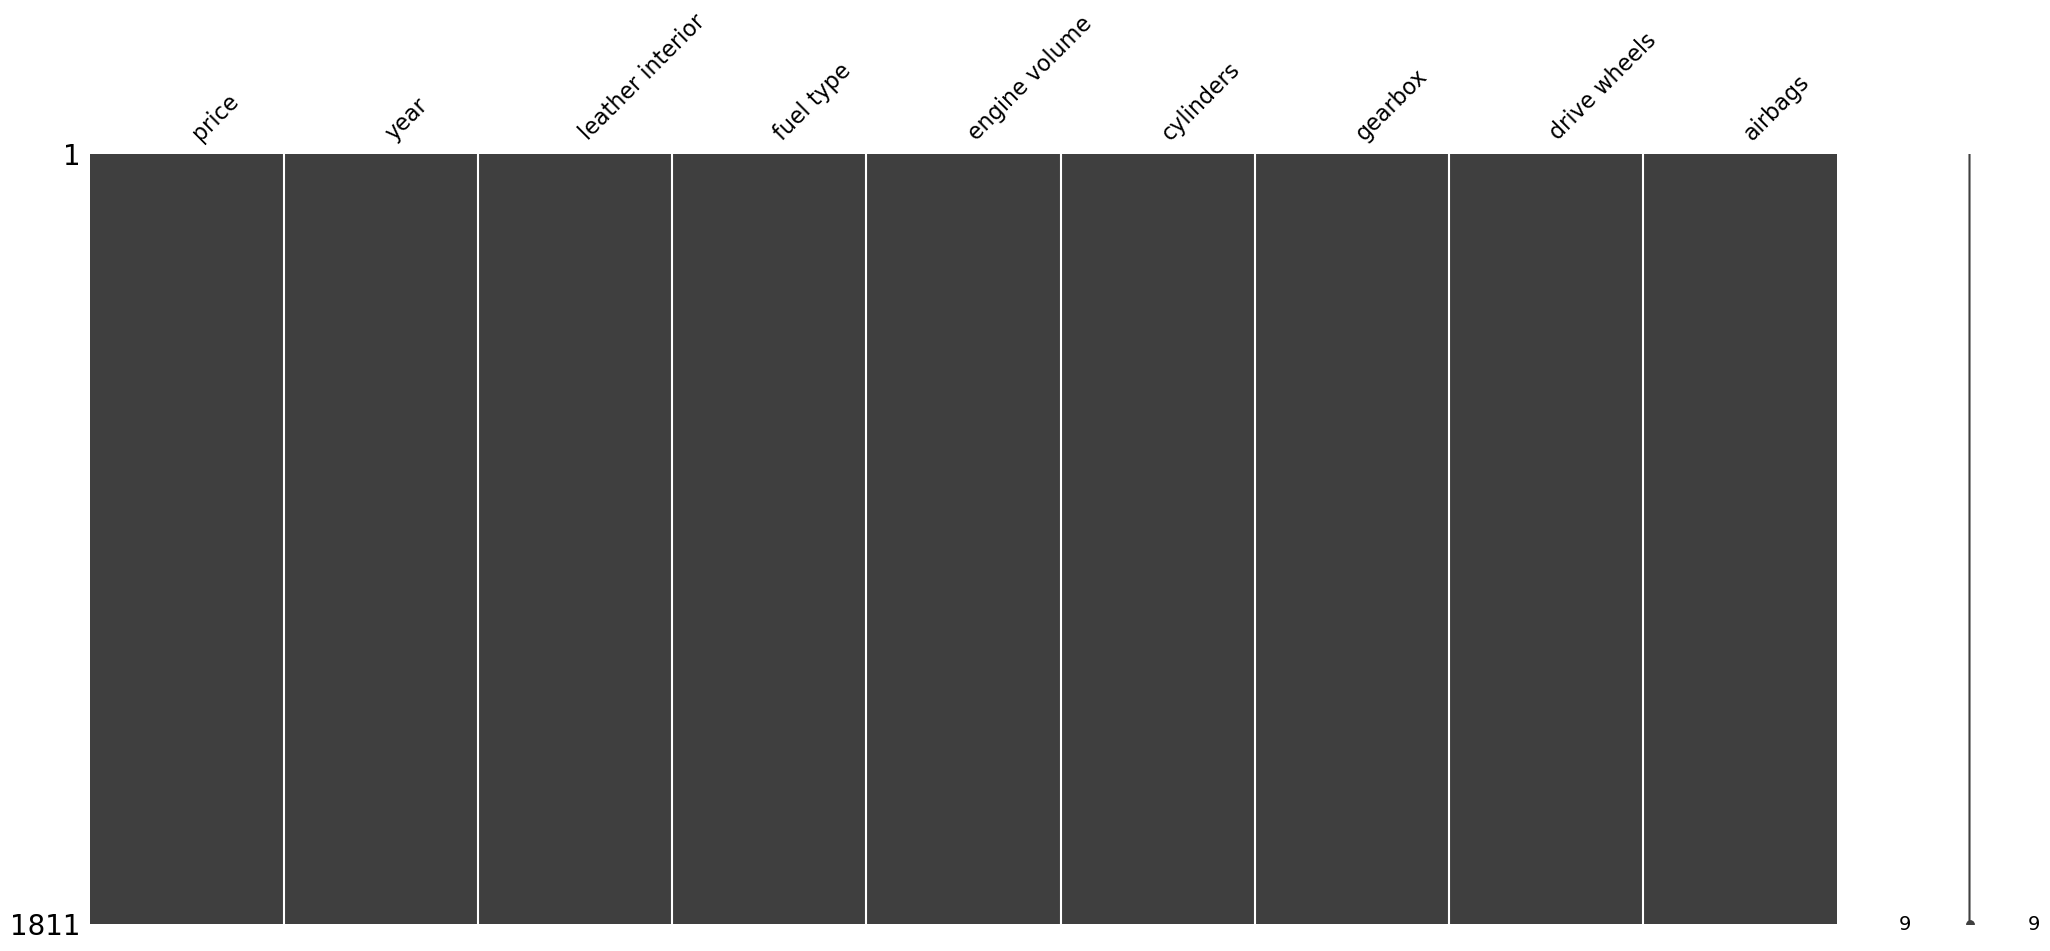

In [13]:
msno.matrix(data)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1811 entries, 11 to 19232
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             1811 non-null   int64  
 1   year              1811 non-null   int64  
 2   leather interior  1811 non-null   object 
 3   fuel type         1811 non-null   object 
 4   engine volume     1811 non-null   object 
 5   cylinders         1811 non-null   float64
 6   gearbox           1811 non-null   object 
 7   drive wheels      1811 non-null   object 
 8   airbags           1811 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 141.5+ KB


### _Transformation to numeric data_

In [15]:
(data["engine volume"] == "2.0 Turbo").any()

True

In [16]:
split_str = data["engine volume"].str.split().str.get(0)
data["engine volume"] = np.array(split_str, dtype = "float64")

In [17]:
data["engine volume"].head()

11    4.0
12    1.6
23    2.0
24    1.8
32    4.4
Name: engine volume, dtype: float64

In [18]:
(data["engine volume"] == "2.0 Turbo").any()

False

### _Aggregation_

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1811.0,22311.077858,618035.393630,1.0,4704.0,7000.0,9408.0,26307500.0
year,1811.0,1997.969630,5.557103,1939.0,1997.0,1999.0,2001.0,2002.0
engine volume,1811.0,2.258807,0.797512,0.2,1.8,2.0,2.5,6.3
cylinders,1811.0,4.678631,1.259870,1.0,4.0,4.0,6.0,16.0
airbags,1811.0,3.731640,3.046198,0.0,2.0,4.0,6.0,16.0


In [20]:
data.groupby('fuel type')[['price']].mean()

,price
fuel type,
CNG,6616.029326
Diesel,93575.594340
Hybrid,7840.000000
LPG,9801.328571
Petrol,7120.818519
Plug-in Hybrid,7840.000000


In [21]:
data.groupby(['fuel type',"gearbox"])['price'].mean().unstack()

gearbox,Automatic,Manual,Tiptronic,Variator
fuel type,,,,
CNG,7335.764706,5560.776596,9059.680000,9408.000000
Diesel,9172.481481,115391.673307,13651.800000,NaN
Hybrid,7840.000000,NaN,NaN,NaN
LPG,11480.777778,7011.500000,9584.517241,NaN
Petrol,8028.086207,6102.580986,8943.013245,6157.615385
Plug-in Hybrid,7840.000000,NaN,NaN,NaN


In [22]:
data.pivot_table('price', index='gearbox', columns='fuel type')

fuel type,CNG,Diesel,Hybrid,LPG,Petrol,Plug-in Hybrid
gearbox,,,,,,
Automatic,7335.764706,9172.481481,7840.0,11480.777778,8028.086207,7840.0
Manual,5560.776596,115391.673307,NaN,7011.500000,6102.580986,NaN
Tiptronic,9059.680000,13651.800000,NaN,9584.517241,8943.013245,NaN
Variator,9408.000000,NaN,NaN,NaN,6157.615385,NaN


### _Outlier observations_

In [23]:
dataInt = data.select_dtypes(include = ["int64", "float64"])
dataInt.head()

,price,year,engine volume,cylinders,airbags
11,8781,1999,4.0,8.0,0
12,3000,1997,1.6,4.0,4
23,7840,2001,2.0,4.0,0
24,4704,1995,1.8,4.0,4
32,6899,2000,4.4,8.0,6


In [24]:
clf = LocalOutlierFactor(n_neighbors= 200, contamination=0.2)
clf.fit_predict(dataInt)

array([ 1,  1,  1, ..., -1,  1, -1])

In [25]:
score = clf.negative_outlier_factor_

In [26]:
np.sort(score)[0:20]

array([-7.52913505e+03, -2.91702930e+01, -1.54804957e+01, -1.41911763e+01,
       -1.38277830e+01, -1.12239553e+01, -1.03579886e+01, -9.07750789e+00,
       -8.90539656e+00, -8.22836926e+00, -7.42975833e+00, -7.42798030e+00,
       -6.58040724e+00, -5.44367104e+00, -5.06057807e+00, -5.06057577e+00,
       -4.65312513e+00, -4.27831407e+00, -4.27698680e+00, -4.13069507e+00])

In [27]:
esik_deger = np.sort(score)[100]

In [28]:
data2 = data[score > esik_deger]

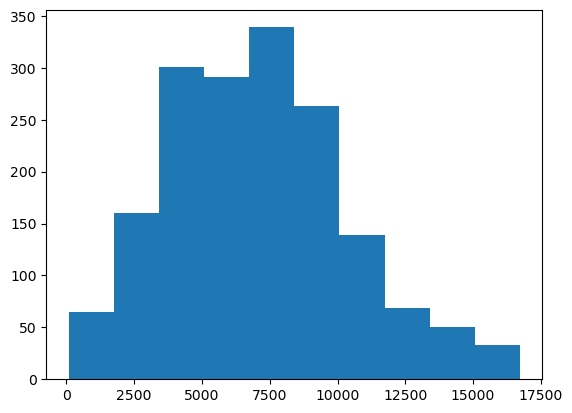

In [29]:
plt.hist(data2["price"]);

In [30]:
len(data)

1811

In [31]:
len(data2)

1710

### _Identifying Outliers: IQR Method_

In [32]:
Q1 = data["price"].quantile(0.25)
Q3 = data["price"].quantile(0.75)
IQR = Q3 - Q1

alt_sinir = Q1 - 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

data3 = data[~((data["price"] < alt_sinir) | (data["price"] > ust_sinir))]

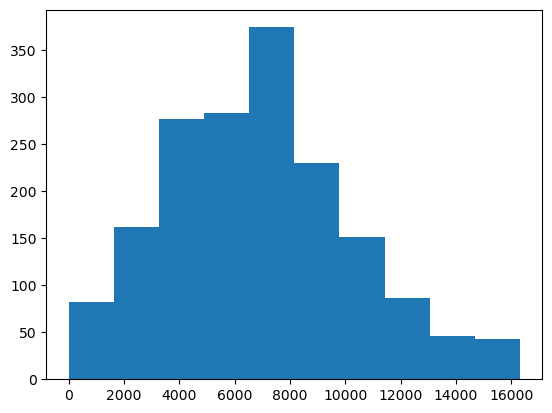

In [33]:
plt.hist(data3["price"],);

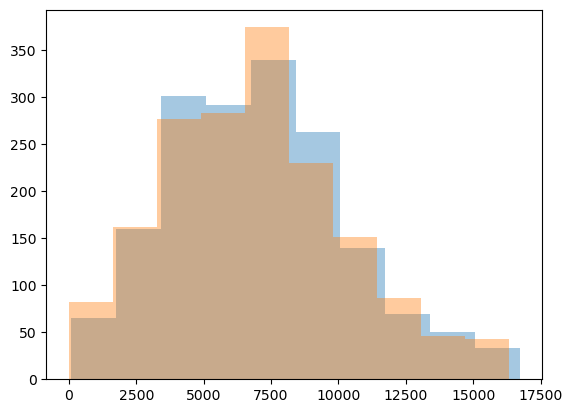

In [34]:
x1 = data2["price"]
x2 = data3["price"]

kwargs = dict(histtype='stepfilled', alpha=0.4)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs);

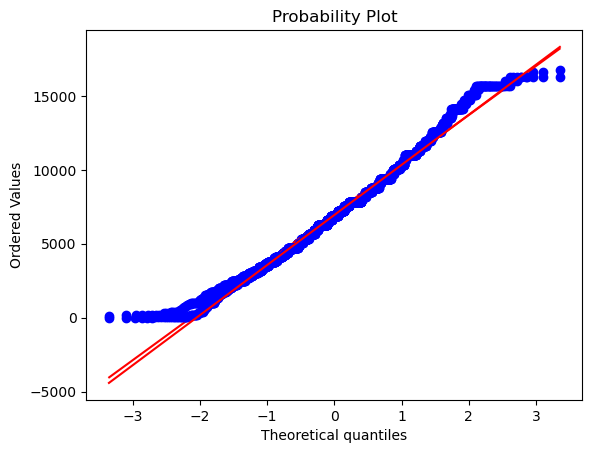

In [35]:
#Probability plot
stats.probplot(data2["price"], dist = "norm", plot = pylab)
stats.probplot(data3["price"], dist = "norm", plot = pylab)
pylab.show()

### _Visualization with data_

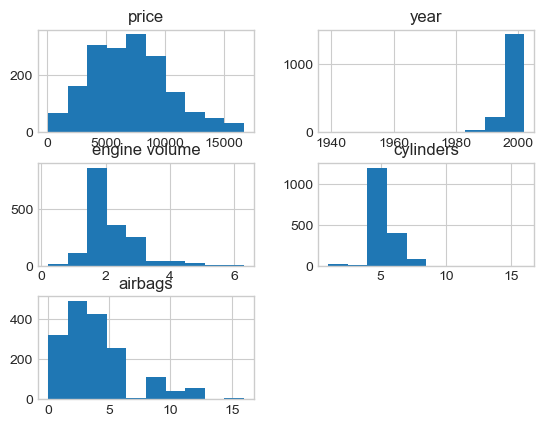

In [36]:
plt.style.use('seaborn-whitegrid')
data2.hist();

In [37]:
data.head()

,price,year,leather interior,fuel type,engine volume,cylinders,gearbox,drive wheels,airbags
11,8781,1999,No,CNG,4.0,8.0,Manual,Rear,0
12,3000,1997,No,CNG,1.6,4.0,Manual,Front,4
23,7840,2001,No,Diesel,2.0,4.0,Manual,Front,0
24,4704,1995,No,Petrol,1.8,4.0,Automatic,Front,4
32,6899,2000,Yes,CNG,4.4,8.0,Automatic,4x4,6


In [38]:
x = np.array(data2['year'])
y = np.array(data2["price"])

C:\Users\samsung\AppData\Local\Temp\ipykernel_13052\1732287364.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok" (-> color='k'). The keyword argument will take precedence.
  main_ax.plot(x, y, 'ok', markersize= 2, alpha=0.2, color="red")


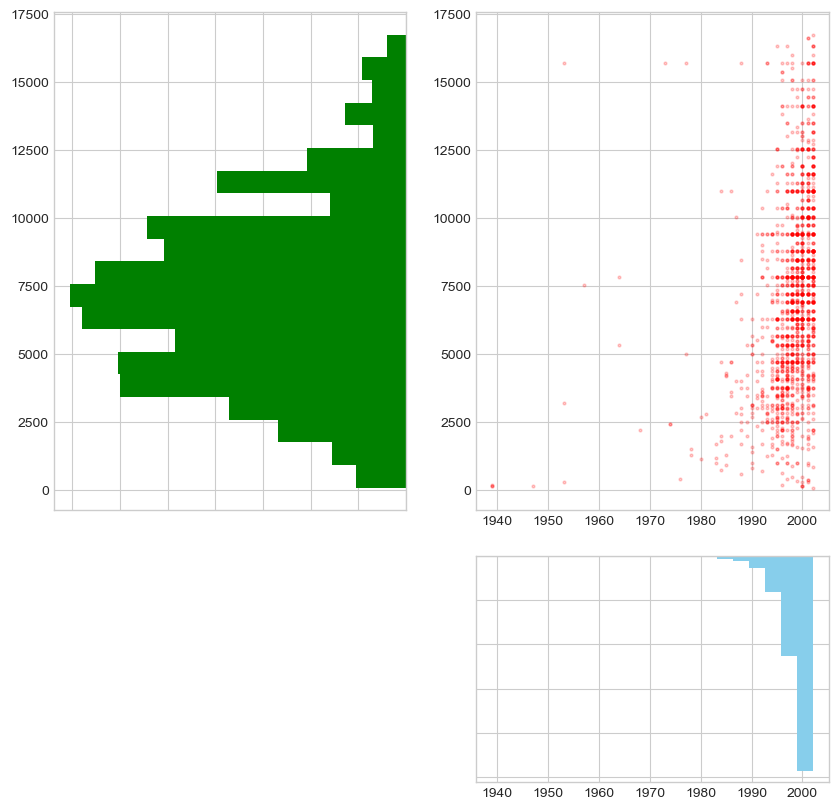

In [39]:
# Set up the axes with gridspec
fig = plt.figure(figsize=(10, 10))
grid = plt.GridSpec(3, 2, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize= 2, alpha=0.2, color="red")

# histogram on the attached axes
x_hist.hist(x, 20, histtype='stepfilled',
            orientation='vertical', color='skyblue')
x_hist.invert_yaxis()
y_hist.hist(y, 20, histtype='stepfilled',
            orientation='horizontal', color='green')
y_hist.invert_xaxis()

C:\Users\samsung\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


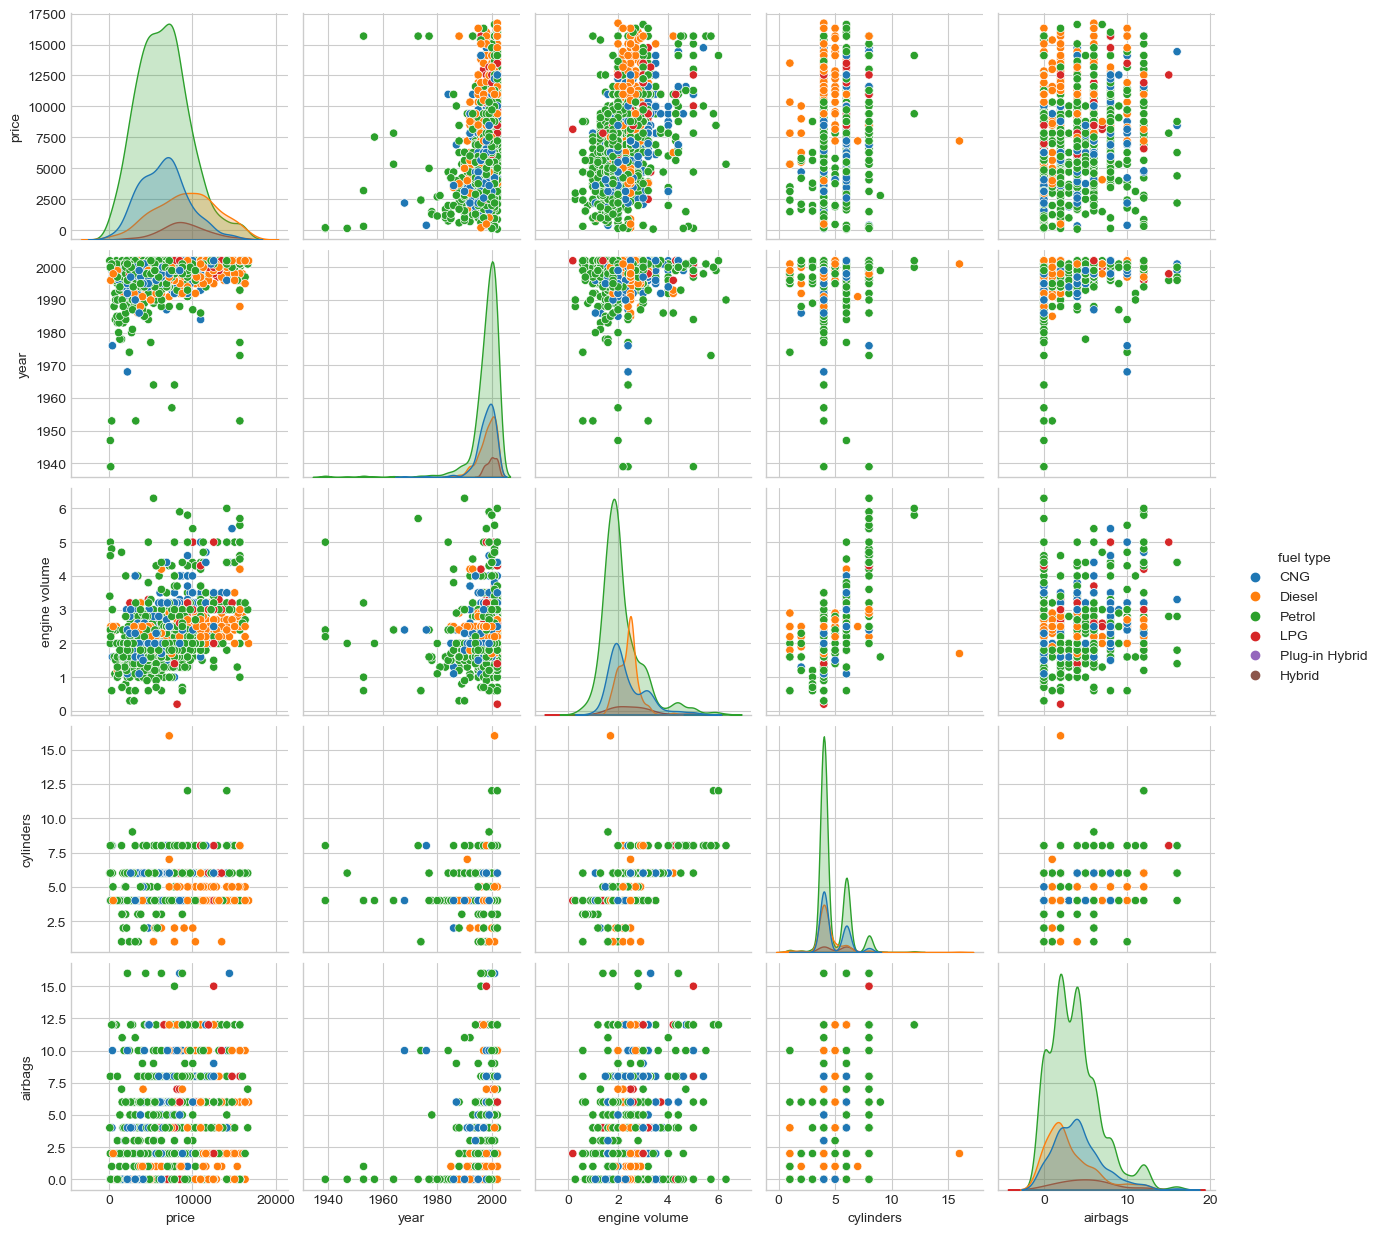

In [40]:
sns.pairplot(data2, hue='fuel type', size=2.5);

### _Preprocessing_

In [41]:
data2.corr()

,price,year,engine volume,cylinders,airbags
price,1.000000,0.299280,0.420337,0.272168,0.243108
year,0.299280,1.000000,0.065364,0.092002,0.281360
engine volume,0.420337,0.065364,1.000000,0.734216,0.333069
cylinders,0.272168,0.092002,0.734216,1.000000,0.356831
airbags,0.243108,0.281360,0.333069,0.356831,1.000000


In [42]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1710 entries, 11 to 19232
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             1710 non-null   int64  
 1   year              1710 non-null   int64  
 2   leather interior  1710 non-null   object 
 3   fuel type         1710 non-null   object 
 4   engine volume     1710 non-null   float64
 5   cylinders         1710 non-null   float64
 6   gearbox           1710 non-null   object 
 7   drive wheels      1710 non-null   object 
 8   airbags           1710 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 198.1+ KB


In [43]:
data2.columns

Index(['price', 'year', 'leather interior', 'fuel type', 'engine volume',
       'cylinders', 'gearbox', 'drive wheels', 'airbags'],
      dtype='object')

In [44]:
dummy_val = pd.get_dummies(data2[["leather interior","fuel type","gearbox","drive wheels","airbags"]])
dummy_val.head()

,airbags,leather interior_No,leather interior_Yes,fuel type_CNG,fuel type_Diesel,fuel type_Hybrid,fuel type_LPG,fuel type_Petrol,fuel type_Plug-in Hybrid,gearbox_Automatic,gearbox_Manual,gearbox_Tiptronic,gearbox_Variator,drive wheels_4x4,drive wheels_Front,drive wheels_Rear
11,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1
12,4,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0
23,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0
24,4,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
32,6,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0


In [45]:
y = data2["price"]

In [46]:
x = data2.drop(["price","leather interior","fuel type","gearbox","drive wheels"], axis = 1).astype("float64")
x.head()

,year,engine volume,cylinders,airbags
11,1999.0,4.0,8.0,0.0
12,1997.0,1.6,4.0,4.0
23,2001.0,2.0,4.0,0.0
24,1995.0,1.8,4.0,4.0
32,2000.0,4.4,8.0,6.0


In [47]:
data3 = pd.concat([y, x, dummy_val[['leather interior_No', 'leather interior_Yes', 'fuel type_CNG',
       'fuel type_Diesel', 'fuel type_LPG', 'fuel type_Petrol',
       'fuel type_Plug-in Hybrid', 'gearbox_Automatic', 'gearbox_Manual',
       'gearbox_Tiptronic', 'gearbox_Variator', 'drive wheels_4x4',
       'drive wheels_Front', 'drive wheels_Rear']]], axis = 1)
data3.head()

,price,year,engine volume,cylinders,airbags,leather interior_No,leather interior_Yes,fuel type_CNG,fuel type_Diesel,fuel type_LPG,fuel type_Petrol,fuel type_Plug-in Hybrid,gearbox_Automatic,gearbox_Manual,gearbox_Tiptronic,gearbox_Variator,drive wheels_4x4,drive wheels_Front,drive wheels_Rear
11,8781,1999.0,4.0,8.0,0.0,1,0,1,0,0,0,0,0,1,0,0,0,0,1
12,3000,1997.0,1.6,4.0,4.0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
23,7840,2001.0,2.0,4.0,0.0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
24,4704,1995.0,1.8,4.0,4.0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
32,6899,2000.0,4.4,8.0,6.0,0,1,1,0,0,0,0,1,0,0,0,1,0,0


### _Multilinear regression_

In [48]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
x = data3.drop("price", axis = 1)
x = x.astype(float)
y = data3["price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 21)

In [50]:
lm = LinearRegression()
model = lm.fit(x_train, y_train)

In [51]:
model.score(x_train, y_train)

0.38794364266597203

In [52]:
y_predict = model.predict(x_test)
r2_score(y_test, y_predict)

0.4395894465917388

In [53]:
np.sqrt(mean_squared_error(y_test, model.predict(x_test)))

2476.5759355339246

### _Lasso Regression_

In [54]:
from sklearn.linear_model import Lasso

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 81)
lasso_model = Lasso().fit(x_train, y_train)

In [56]:
lasso_model.coef_

array([ 1.57406387e+02,  8.37074308e+02, -4.24594851e+01,  6.69200608e+01,
        1.25018023e+02, -1.07090849e-13, -1.36435803e+03,  1.03880106e+03,
        2.92524264e+02, -1.06443237e+03, -0.00000000e+00, -2.92921260e+02,
       -3.83238208e+02,  4.43335140e+02,  9.32403837e+02,  7.70600897e+02,
       -1.73636276e+03,  0.00000000e+00])

#### _Lasso Model Tuning_

In [57]:
from sklearn.linear_model import LassoCV

In [58]:
lasso_cv = LassoCV(alphas=None, cv=20, max_iter=5000, normalize=True)
lasso_cv.fit(x_train, y_train)

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(cv=20, max_iter=5000, normalize=True)

In [59]:
lasso_cv.alpha_

1.0903668863755287

In [60]:
lasso_tuned = Lasso(alpha=lasso_cv.alpha_)
lasso_tuned.fit(x_train, y_train)

Lasso(alpha=1.0903668863755287)

In [61]:
lasso_tuned.score(x_train, y_train)

0.38989068102890834

In [62]:
y_predict = lasso_tuned.predict(x_test)
r2_score(y_test, y_predict)

0.4210657864909779

In [63]:
np.sqrt(mean_squared_error(y_test, lasso_tuned.predict(x_test)))

2522.4915593111773

### _Gradient Boosting Machines_

In [64]:
from sklearn.ensemble import GradientBoostingRegressor
gbm_model = GradientBoostingRegressor()
gbm_model.fit(x_train, y_train)

GradientBoostingRegressor()

In [65]:
y_predict = gbm_model.predict(x_test)
r2_score(y_test, y_predict)

0.45686555927347505

In [66]:
np.sqrt(mean_squared_error(y_test, gbm_model.predict(x_test)))

2443.2549372695844

#### _GBM Tuning_

In [67]:
gbm_params = {"learning_rate": [0.002, 0.01, 0.1, 0.2],
              "max_depth": [2, 3, 5, 8, 20, 50],
              "n_estimators": [200, 500, 1000],
              "subsample": [1, 0.25, 0.5, 0.7, 0.9]}

In [68]:
gbm_model = GradientBoostingRegressor()
gbm_model_cv = GridSearchCV(gbm_model, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_model_cv.fit(x_train, y_train)

Fitting 10 folds for each of 360 candidates, totalling 3600 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.002, 0.01, 0.1, 0.2],
                         'max_depth': [2, 3, 5, 8, 20, 50],
                         'n_estimators': [200, 500, 1000],
                         'subsample': [1, 0.25, 0.5, 0.7, 0.9]},
             verbose=2)

In [69]:
gbm_model_cv.best_params_

{'learning_rate': 0.002,
 'max_depth': 8,
 'n_estimators': 1000,
 'subsample': 0.25}

In [70]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.002,
                                      max_depth = 8,
                                      n_estimators = 1000,
                                      subsample = 0.25)
gbm_tuned = gbm_tuned.fit(x_train, y_train)

In [71]:
y_predict = gbm_tuned.predict(x_test)
r2_score(y_test, y_predict)

0.4664065634557034

In [72]:
np.sqrt(mean_squared_error(y_test, y_predict))

2421.7000633911366

In [73]:
gbm_tuned.score(x_train, y_train)

0.6275279987527156

In [75]:
print("Multilinear Model RMSE : ", Out[53])
print("Multilinear Model Score : ", Out[51], '\n')

print("Lasso Tuned Model RMSE : ", Out[63])
print("Lasso Tuned Model Score : ", Out[61], '\n')

print("GBM Tuned Model RMSE : ", Out[72])
print("GBM Tuned Model Score : ", Out[73], '\n')

Multilinear Model RMSE :  2476.5759355339246
Multilinear Model Score :  0.38794364266597203 

Lasso Tuned Model RMSE :  2522.4915593111773
Lasso Tuned Model Score :  0.38989068102890834 

GBM Tuned Model RMSE :  2421.7000633911366
GBM Tuned Model Score :  0.6275279987527156 

